In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

wd = '/Users/ewenwang/Documents/practice_data/'
dataFile = 'credit_score.csv'
data = pd.read_csv(wd+dataFile)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [25]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
target = 'SeriousDlqin2yrs'
features = [x for x in data.columns if x not in [target]]

In [30]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('std_scalar', StandardScaler()),
])

features_tr = pd.DataFrame(num_pipeline.fit_transform(data[features]), columns=features)
data_tr = pd.concat([data[target], features_tr], axis=1)
data_tr.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,-0.021150,-0.493860,0.376593,-0.172833,0.209579,0.883657,-0.063793,4.409546,-0.057852,1.140530
1,0,-0.020385,-0.832342,-0.100419,-0.173168,-0.296226,-0.865297,-0.063793,-0.901283,-0.057852,0.237202
2,0,-0.021582,-0.967735,0.138087,-0.173186,-0.261937,-1.253953,0.176056,-0.901283,-0.057852,-0.666126
3,0,-0.023281,-1.509307,-0.100419,-0.173210,-0.241922,-0.670969,-0.063793,-0.901283,-0.057852,-0.666126
4,0,-0.020585,-0.223074,0.138087,-0.173215,4.435064,-0.282312,-0.063793,-0.016145,-0.057852,-0.666126


In [5]:
import Comparison

In [37]:
com = Comparison.Comparison(data_tr, target, predictors, 'average_precision', 'records.log')

In [38]:
com.AmongModels()

LR:	0.235538 (0.013326)	time: 4.364103 s
SDG:	0.234800 (0.087617)	time: 0.992988 s
LDA:	0.246856 (0.013576)	time: 0.976452 s
KNN:	0.195763 (0.013270)	time: 50.412824 s
NB:	0.172580 (0.009159)	time: 0.488718 s
CART:	0.123840 (0.007776)	time: 9.501469 s
BAG:	0.272716 (0.014322)	time: 39.906264 s
RF:	0.283780 (0.016664)	time: 12.632658 s
ERT:	0.257607 (0.014922)	time: 8.739983 s
ABDT:	0.262720 (0.029241)	time: 482.918251 s
GBDT:	0.399594 (0.016892)	time: 73.947909 s
NN:	0.367929 (0.014639)	time: 102.736739 s


,algorithm,score_mean,score_std,time,ratio
0,LR,0.235538,0.013326,4.364103,0.037653
1,SDG,0.234800,0.087617,0.992988,-7.834623
2,LDA,0.246856,0.013576,0.976452,-2.557232
3,KNN,0.195763,0.013270,50.412824,0.009776
4,NB,0.172580,0.009159,0.488718,-0.041599
5,CART,0.123840,0.007776,9.501469,0.006812
6,BAG,0.272716,0.014322,39.906264,0.020175
7,RF,0.283780,0.016664,12.632658,0.031752
8,ERT,0.257607,0.014922,8.739983,0.030611
9,ABDT,0.262720,0.029241,482.918251,0.011169


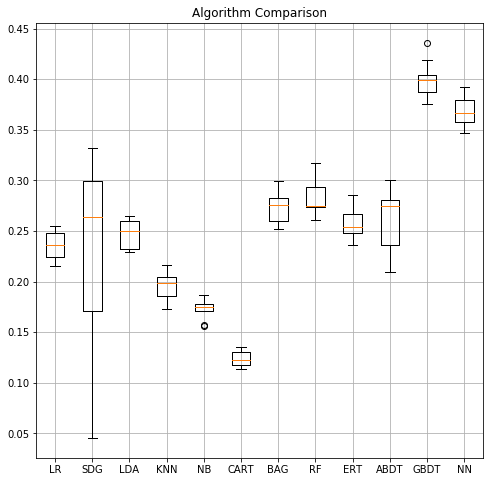

In [39]:
com.Visual()

In [56]:
com.AmongResults.sort_values(by='ratio', ascending=False)

,algorithm,score_mean,score_std,time,ratio
10,GBDT,0.399594,0.016892,73.947909,0.103835
11,NN,0.367929,0.014639,102.736739,0.085184
7,RF,0.283780,0.016664,12.632658,0.062490
2,LDA,0.246856,0.013576,0.976452,0.061083
1,SDG,0.234800,0.087617,0.992988,0.055170
8,ERT,0.257607,0.014922,8.739983,0.053427
6,BAG,0.272716,0.014322,39.906264,0.051442
0,LR,0.235538,0.013326,4.364103,0.047878
9,ABDT,0.262720,0.029241,482.918251,0.037205
4,NB,0.172580,0.009159,0.488718,0.031994


In [12]:
from gossipcat import Glimpse

glimpse = Glimpse(data=data_tr, target=target, features=features)

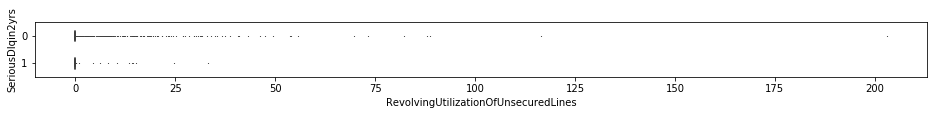

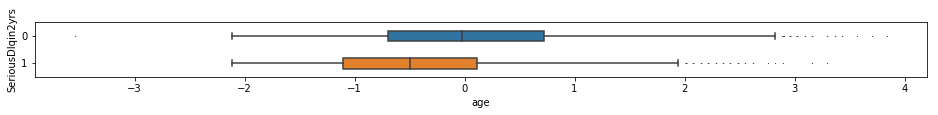

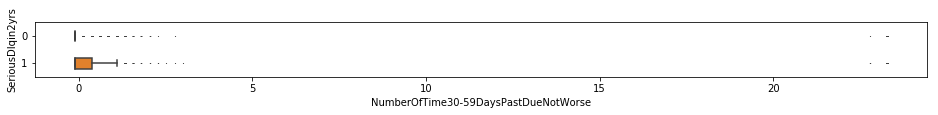

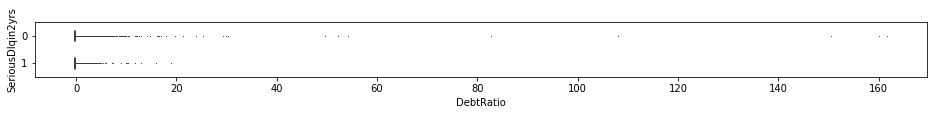

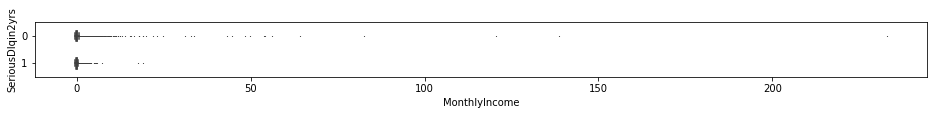

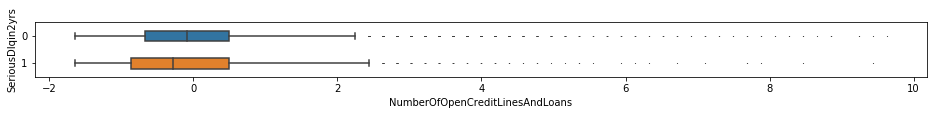

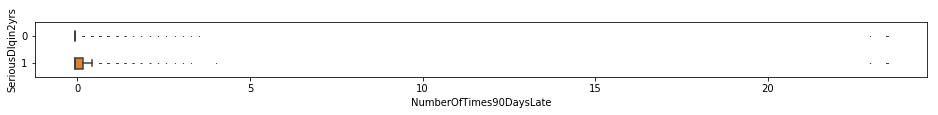

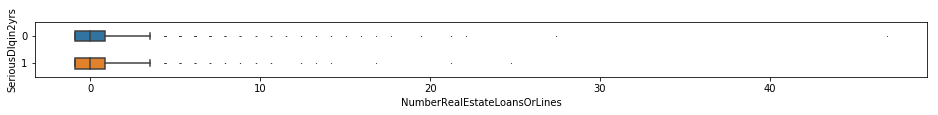

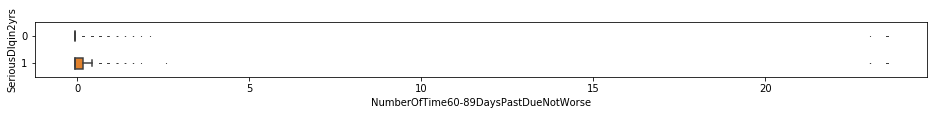

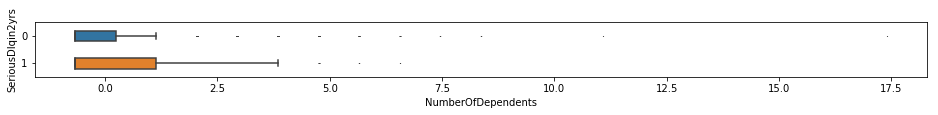

In [13]:
glimpse.BiBoxplot()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
def DenBox(data, target, features):
    targetList = data[target].unique().tolist()
    for f in features:
        fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16, 6))
        fig.suptitle('Distribution Comparison')
        
        for cat in targetList:
          sns.kdeplot(data[f][data[target]==cat], shade=True, label=cat, ax=ax1)
          ax1.set(ylabel='density')
          ax1.legend(title=target)

        sns.boxplot(y=target, x=f, data=data, orient='h', width=0.4, fliersize=0.3, ax=ax2)
        ax1.get_shared_x_axes().join(ax1, ax2)
        
        fig.subplots_adjust(hspace=0)
        plt.show()
    return None

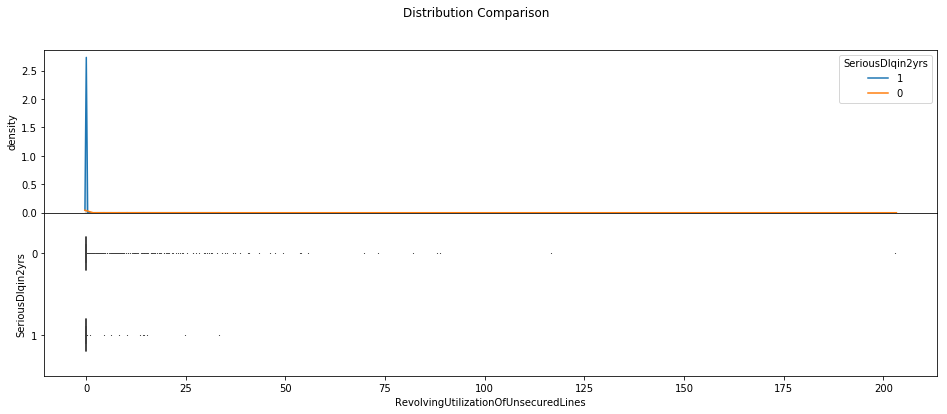

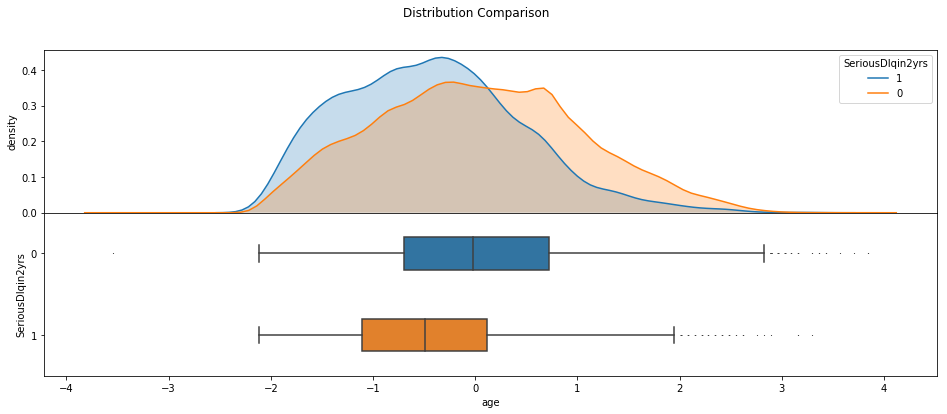

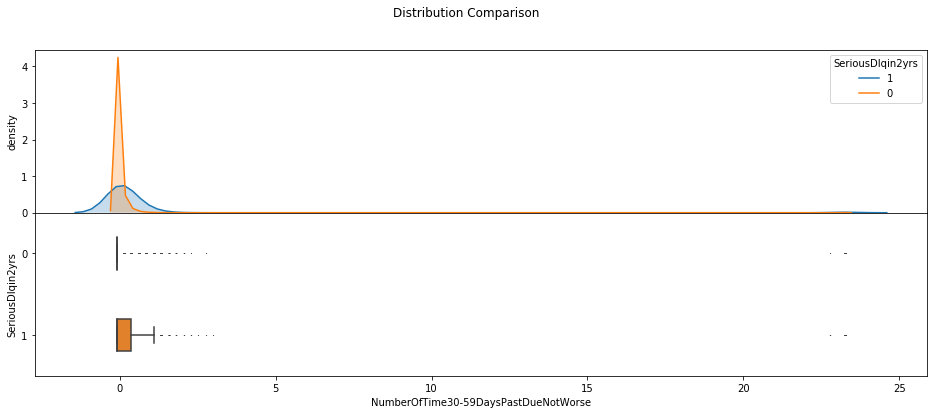

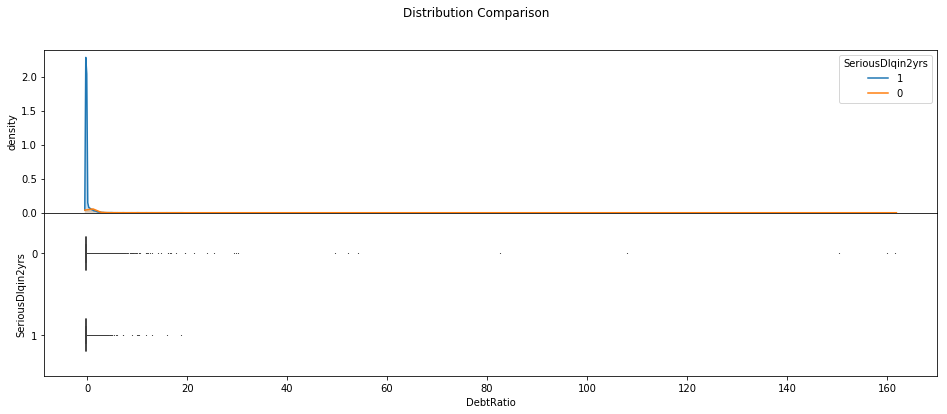

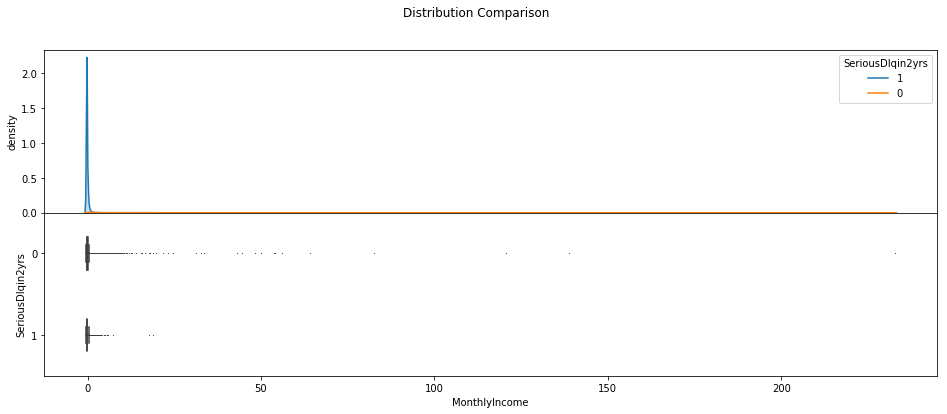

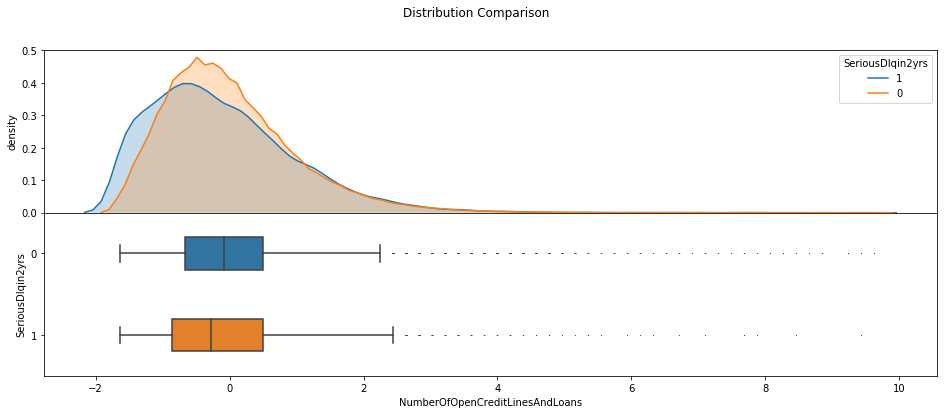

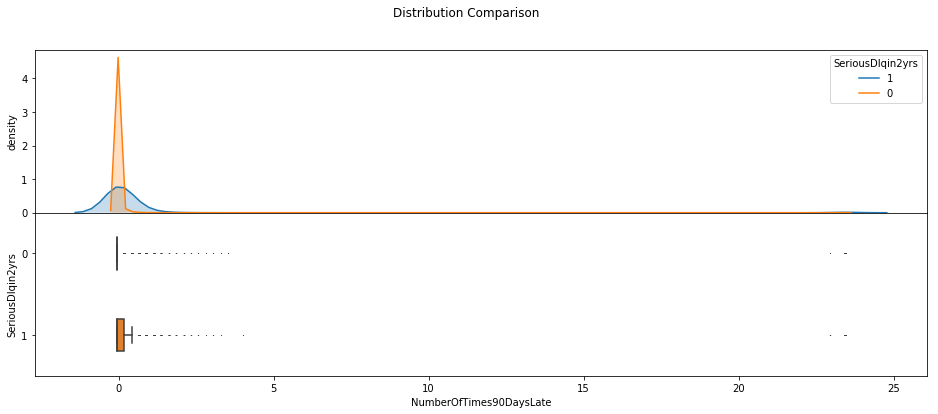

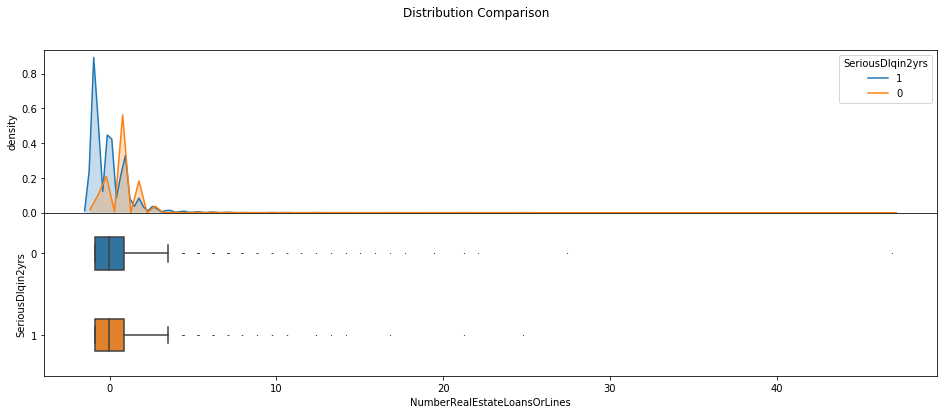

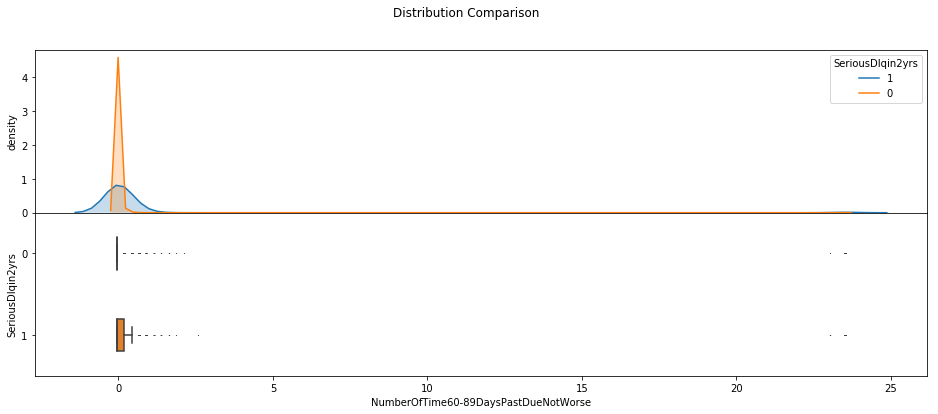

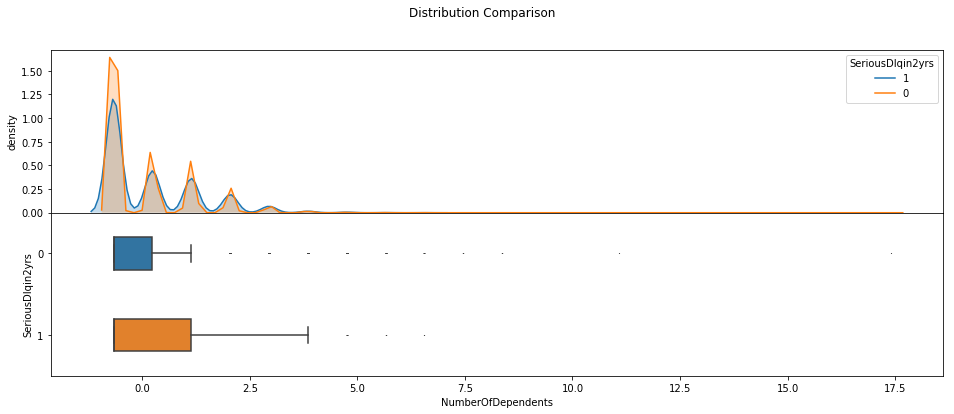

In [81]:
DenBox(data_tr, target, features)

In [83]:
for f in features:
    print(f, len(data[f].unique()))

RevolvingUtilizationOfUnsecuredLines 125728
age 86
NumberOfTime30-59DaysPastDueNotWorse 16
DebtRatio 114194
MonthlyIncome 13595
NumberOfOpenCreditLinesAndLoans 58
NumberOfTimes90DaysLate 19
NumberRealEstateLoansOrLines 28
NumberOfTime60-89DaysPastDueNotWorse 13
NumberOfDependents 14


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

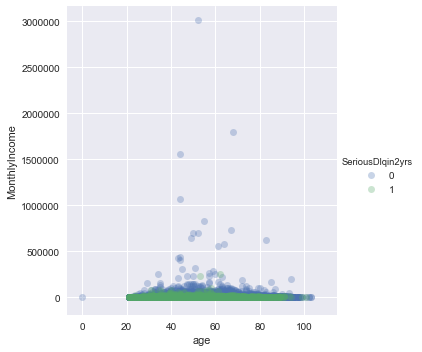

In [111]:
sns.lmplot(x='age', y="MonthlyIncome", hue=target, data=data, fit_reg=False, scatter_kws={'alpha':0.3})